In [1]:
import numpy as np
import pandas as pd

## Load and processing

In [2]:
df_news = pd.read_csv("lenta-ru-news.csv")
df_news["date"] = pd.to_datetime(df_news["date"])
df_news.head()

C:\Users\Laptop_user\AppData\Local\Temp\ipykernel_13944\2019238741.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_news = pd.read_csv("lenta-ru-news.csv")


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [3]:
MIN_COUNT = len(df_news) * 0.005

### Select only if text exists:

In [4]:
df_news = df_news[df_news["text"].notna()]

### Null percentages and topic filtration:

In [5]:
percent_topic_missing = df_news["topic"].isnull().sum() * 100 / len(df_news)
percent_topic_missing

7.740864202154887

In [6]:
topics_to_use = df_news.topic.value_counts()[
    df_news.topic.value_counts() > MIN_COUNT
].index


df_news = df_news[df_news.topic.isin(topics_to_use)]


df_news.topic.value_counts(normalize=True)

topic
Россия               0.217841
Мир                  0.185497
Экономика            0.107980
Спорт                0.087457
Культура             0.073042
Бывший СССР          0.072507
Наука и техника      0.072146
Интернет и СМИ       0.060642
Из жизни             0.037481
Дом                  0.029510
Силовые структуры    0.026607
Ценности             0.010544
Бизнес               0.010046
Путешествия          0.008701
Name: proportion, dtype: float64

<Axes: >

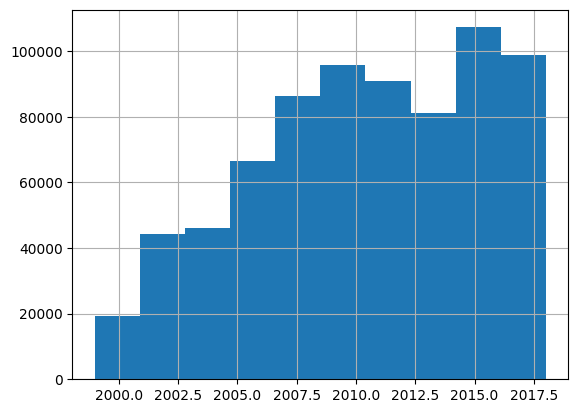

In [7]:
df_news.date.dt.year.hist()

In [8]:
percent_tags_missing = df_news["tags"].isnull().sum() * 100 / len(df_news)
percent_tags_missing

3.572805726482265

In [9]:
df_news["tags"].value_counts()

tags
Все                 452728
Политика             33220
Общество             27560
Украина              17934
Происшествия         15972
                     ...  
Социальная сфера        70
Вкусы                   54
Фотография              28
Страноведение           21
Выборы                  11
Name: count, Length: 78, dtype: int64

In [10]:
percent_missing = df_news["text"].isnull().sum() * 100 / len(df_news)
percent_missing

0.0

In [11]:
len(df_news)

736508

In [14]:
df_news.iloc[100]["text"]

'Сегодня днем в столице Греции произошло землетрясение силой 5,9 балла по шкале Рихтера. Согласно данным греческих сейсмологов, эпицентр находился в 20 километрах к северо-западу от Афин. В результате подземных толчков вибрировали здания, некоторые из них покрылись трещинами, во многих местах осыпалась штукатурка. По данным полиции, в северной части Афин рухнул один дом. По радио было передано обращение местных властей к столичным жителям с указанием покинуть жилые помещения в связи с продолжающейся сейсмической активностью. Люди сильно озабочены происходящим, пытаются дозвониться до родственников или добраться на автомобиле туда, где находятся их дети - в школы, детские сады. Люди крайне взволнованы, все вспоминают о недавнем разрушительном землетрясении в соседней Турции. В результате подземных толчков в Афинах вышли из строя станции мобильной телефонной связи.'

In [56]:
df_news = df_news[~df_news["text"].str.contains("\(function")]

In [64]:
df_news[df_news["text"].str.contains("var ")].text.values

array(['Немецкие компьютерные эксперты пытаются восстановить информацию, содержащуюся в компьютерах Международного торгового центра, сообщает Reuters. Дело в том, что за считанные минуты до падения небоскребов была зафиксирована необычайно высокая активность финансовых переводов, идущих через компьютеры WTC. Специалисты немецкой фирмы Convar пытаются восстановить содержимое жестких дисков компьютеров, найденных в развалинах WTC, в надежде, что эти данные помогут ответить на вопрос, кто и куда переводил эти деньги. "Мы подозреваем, что кого-то предупредили о готовящемся теракте и он использовал эту информацию  для того, чтобы осуществить несколько незаконных финансовых операций, надеясь, что в результате всего этого хаоса его деятельность, по крайней мере, не сразу будет замечена", - считает директор фирмы Петер Хеншель (Peter Henschel). "Разумеется, всегда остается возможность того, что существовала какая-то причина, из-за которой объемы финансовых операций так возросли, - считает он. 

In [65]:
df_news[df_news["text"].str.contains("Link in my bio")].text.values

array(['Ученые из университета Калгари в Канаде выяснили, что в нескольких сотнях километров над поверхностью Земли образуются «реки» газа, температура которого достигает трех тысяч градусов Цельсия. Это показал один из спутников Swarm, который пролетел сквозь «Стив» — недавно открытую разновидность полярного сияния. Об этом сообщается на сайте Phys.org. «Стив» впервые был замечен добровольцами из организации Alberta Aurora Chasers, которые занимаются наблюдениями полярных сияний. Они обнаружили относительно узкие ленты зеленого и фиолетового света, которые отличались от других известных разновидностей Aurora Borealis. Это атмосферное явление может простираться на сотни или тысячи километров, а ширина «ленты» достигает 25-30 километров. Last fall i captured an image of an auroral phenomenon that was largely unexplained. Until now...... I was told many versions of what it was but until today i had yet to learn the truth. \nI was contacted by a U of Calgary scientist who has been researc

In [68]:
df_strange = df_news[
    df_news["text"].str.count("e")
    + df_news["text"].str.count("t")
    + df_news["text"].str.count("a")
    + df_news["text"].str.count("o")
    > 100
]

In [73]:
df_strange["text"].iloc[0]

'Минувшей ночью состоялось ежегодное вручение музыкальных призов от MTV. Так выглядит список награжденных. Самое лучшее VIDEO: Lauryn Hill, "Doo Wop (That Thing)" Лучшее мужское VIDEO: Will Smith, "Miami" Лучшее женское VIDEO: Lauryn Hill, "Doo Wop (That Thing)"Лучший клип группы: TLC, "No Scrubs" Лучшее RAP-VIDEO: Jay-Z featuring Ja & Amil-lion, "Can I Get A..." Лучшее HIP-HOP VIDEO: Beastie Boys, "Intergalactic" Лучшая режиссура: Fatboy Slim, "Praise You" Лучшее танцевальное VIDEO: Ricky Martin, "Livin\' La Vida Loca" Лучшее rock-VIDEO: Korn, "Freak on a Leash"Лучшее pop-VIDEO: Ricky Martin, "Livin\' La Vida Loca" Открытие года: Eminem, "My Name Is" Лучшее VIDEO из фильма: Madonna, "Beautiful Stranger" Прорыв в области VIDEO: Fatboy Slim, "Praise You" Приз зрительских симпатий: Backstreet Boys, "I Want it That Way" Лучшая хореография: Fatboy Slim, "Praise You" Лучшие спецэффекты: Garbage, "Special" Лучшая художественная режиссура: Lauryn Hill, "That Thing" Лучший монтаж : Korn, "Frea

In [32]:
# sdf_news[["title", "text", "topic", "date"]].to_csv("data/processed_news.csv")